# Predicting Minneapolis Housing Rental Prices: A Machine Learning Approach

# Introduction

Can machine learning be used to predict housing rental prices in Minneapolis? This project aims to address this question by presenting compelling evidence of the effectiveness of a random forest regression model in predicting rental prices. Through rigorous analysis and evaluation, we have demonstrated that the model achieves accurate predictions, making it a valuable tool for decision-makers in the housing industry. By harnessing the power of machine learning, this model offers the potential to improve the efficiency and accuracy of rental price estimations, assisting stakeholders in making informed decisions and optimizing their strategies. With its ability to incorporate various relevant features and adapt to complex datasets, the random forest regression model opens up new possibilities for predicting and understanding rental prices in the dynamic housing market of Minneapolis.

We begin by importing the libraries and modules used in our analysis.

In [3]:
import pandas as pd
import numpy as np
import requests
import warnings
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


# Settings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

# Data Aquisition and Preprocessing

Now, let us turn our attention to the data acquisition phase of our analysis. To represent the dynamic Minneapolis housing market, we rely on the comprehensive dataset provided by Zillow rental listings. Zillow has emerged as a trusted and reputable source for real estate information, offering a wealth of data on rental properties. By leveraging Zillow listings, we ensure the reliability and accuracy of the data used in our analysis. Zillow's extensive coverage of the housing market, coupled with its commitment to data integrity, makes it an ideal choice for capturing the diverse range of rental properties available in Minneapolis. By utilizing Zillow's dataset, we can confidently embark on our analysis, knowing that we have access to reliable and up-to-date information that will form the foundation of our research.

(Note: Our process of acquiring rental listings from zillow utilizes the following github repository: https://github.com/analyticsariel/projects/blob/master/property_data/zillow_property_search_detail_scrapeak.ipynb)

In [4]:
# Read in api key file
df_api_key = pd.read_csv("api-key.csv")

# Get key
api_key = df_api_key.iloc[0, 0]

# Define function to acquire zillow rental listings
def get_listings(api_key, listing_url):
    url = "https://app.scrapeak.com/v1/scrapers/zillow/listing"

    querystring = {
        "api_key": api_key,
        "url":listing_url
    }

    return requests.request("GET", url, params=querystring)

# Declare Zillow search urls
rent_listing_url_1 = "https://www.zillow.com/minneapolis-mn/rentals/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22north%22%3A45.106004744911594%2C%22south%22%3A44.83518269114975%2C%22east%22%3A-92.9567795559082%2C%22west%22%3A-93.56617744409179%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5983%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22mp%22%3A%7B%22max%22%3A1200%7D%2C%22price%22%3A%7B%22max%22%3A198403%7D%7D%2C%22isListVisible%22%3Atrue%7D"
rent_listing_url_2 = "https://www.zillow.com/minneapolis-mn/rentals/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22north%22%3A45.106004744911594%2C%22south%22%3A44.83518269114975%2C%22east%22%3A-92.9567795559082%2C%22west%22%3A-93.56617744409179%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5983%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22mp%22%3A%7B%22max%22%3A1600%2C%22min%22%3A1200%7D%2C%22price%22%3A%7B%22max%22%3A297605%2C%22min%22%3A238084%7D%7D%2C%22isListVisible%22%3Atrue%7D"
rent_listing_url_3 = "https://www.zillow.com/minneapolis-mn/rentals/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22north%22%3A45.106004744911594%2C%22south%22%3A44.83518269114975%2C%22east%22%3A-92.9567795559082%2C%22west%22%3A-93.56617744409179%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5983%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22mp%22%3A%7B%22max%22%3A2400%2C%22min%22%3A1600%7D%2C%22price%22%3A%7B%22max%22%3A396806%2C%22min%22%3A317445%7D%7D%2C%22isListVisible%22%3Atrue%7D"
rent_listing_url_4 = "https://www.zillow.com/minneapolis-mn/rentals/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22mapBounds%22%3A%7B%22north%22%3A45.106004744911594%2C%22south%22%3A44.83518269114975%2C%22east%22%3A-92.9567795559082%2C%22west%22%3A-93.56617744409179%7D%2C%22mapZoom%22%3A12%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A5983%2C%22regionType%22%3A6%7D%5D%2C%22isMapVisible%22%3Atrue%2C%22filterState%22%3A%7B%22fore%22%3A%7B%22value%22%3Afalse%7D%2C%22mf%22%3A%7B%22value%22%3Afalse%7D%2C%22auc%22%3A%7B%22value%22%3Afalse%7D%2C%22nc%22%3A%7B%22value%22%3Afalse%7D%2C%22fr%22%3A%7B%22value%22%3Atrue%7D%2C%22land%22%3A%7B%22value%22%3Afalse%7D%2C%22manu%22%3A%7B%22value%22%3Afalse%7D%2C%22fsbo%22%3A%7B%22value%22%3Afalse%7D%2C%22cmsn%22%3A%7B%22value%22%3Afalse%7D%2C%22fsba%22%3A%7B%22value%22%3Afalse%7D%2C%22mp%22%3A%7B%22min%22%3A2400%7D%2C%22price%22%3A%7B%22min%22%3A476167%7D%7D%2C%22isListVisible%22%3Atrue%7D"

# Define the URLs in a list
rent_listing_urls = [rent_listing_url_1, rent_listing_url_2, rent_listing_url_3, rent_listing_url_4]

# Create an empty list to store the responses
rent_listing_responses = []

# Iterate over the URLs and make API calls
for url in rent_listing_urls:
    response = get_listings(api_key, url)
    rent_listing_responses.append(response)


In [5]:
# Create a DataFrame to store the combined data
df_rent_listings = pd.concat(
    [pd.json_normalize(response.json()["data"]["cat1"]["searchResults"]["mapResults"]) for response in rent_listing_responses],
    ignore_index=True
)
df_rent_listings.head()

,buildingId,lotId,price,minBeds,minBaths,minArea,imgSrc,hasImage,plid,isFeaturedListing,isShowcaseListing,unitCount,isHomeRec,buildingName,isBuilding,address,badgeInfo,statusType,statusText,listingType,isFavorite,detailUrl,has3DModel,hasAdditionalAttributions,canSaveBuilding,timeOnZillow,latLong.latitude,latLong.longitude,variableData.type,variableData.text,zpid,priceLabel,beds,baths,area,isUserClaimingOwner,isUserConfirmedClaim,visited,shouldShowZestimateAsPrice,pgapt,sgapt,hasVideo,availabilityDate,variableData.data.isFresh,hdpData.homeInfo.zpid,hdpData.homeInfo.zipcode,hdpData.homeInfo.city,hdpData.homeInfo.state,hdpData.homeInfo.latitude,hdpData.homeInfo.longitude,hdpData.homeInfo.price,hdpData.homeInfo.bathrooms,hdpData.homeInfo.bedrooms,hdpData.homeInfo.livingArea,hdpData.homeInfo.homeType,hdpData.homeInfo.homeStatus,hdpData.homeInfo.daysOnZillow,hdpData.homeInfo.isFeatured,hdpData.homeInfo.shouldHighlight,hdpData.homeInfo.isRentalWithBasePrice,hdpData.homeInfo.rentZestimate,hdpData.homeInfo.isUnmappable,hdpData.homeInfo.isPreforeclosureAuction,hdpData.homeInfo.homeStatusForHDP,hdpData.homeInfo.priceForHDP,hdpData.homeInfo.isNonOwnerOccupied,hdpData.homeInfo.isPremierBuilder,hdpData.homeInfo.isZillowOwned,hdpData.homeInfo.currency,hdpData.homeInfo.country,hdpData.homeInfo.unit,hdpData.homeInfo.isShowcaseListing,badgeInfo.type,badgeInfo.text,hdpData.homeInfo.datePriceChanged,hdpData.homeInfo.priceReduction,hdpData.homeInfo.priceChange,hdpData.homeInfo.zestimate,hdpData.homeInfo.taxAssessedValue,hdpData.homeInfo.lotAreaValue,hdpData.homeInfo.lotAreaUnit,streetViewMetadataURL,streetViewURL,hdpData.homeInfo.videoCount
0,44.967564--93.28392,1.001925e+09,$816+/mo,0.0,1.0,320.0,https://photos.zillowstatic.com/fp/b43d7b91557...,True,3vc15hjx17xj1,True,False,20.0,False,330 Oak Grove,True,"330 Oak Grove St, Minneapolis, MN",NaN,FOR_RENT,330 Oak Grove,,False,/apartments/minneapolis-mn/330-oak-grove/5XpDqP/,True,False,True,4206451,44.967564,-93.283920,3D_HOME,3D Tour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,"$1,075/mo",NaN,NaN,NaN,https://photos.zillowstatic.com/fp/f19f0615b77...,True,NaN,True,False,NaN,False,NaN,NaN,--,NaN,FOR_RENT,Apartment for rent,,False,/apartments/minneapolis-mn/axon-green/5XrKqv/,False,False,NaN,7202384,44.945880,-93.326004,TIME_ON_INFO,2 hours ago,2075654103,$1.1K,0.0,1.0,410.0,False,False,False,False,ForRent,For Rent,False,2023-07-18 00:00:00,True,2.075654e+09,55416,Minneapolis,MN,44.94588,-93.326004,1075.0,1.0,0.0,410.0,APARTMENT,FOR_RENT,-1.0,True,False,False,1064.0,False,False,FOR_RENT,1075.0,True,False,False,USD,USA,# E257,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44.94594--93.325424,1.002172e+09,"$1,050+/mo",0.0,1.0,315.0,https://photos.zillowstatic.com/fp/f19f0615b77...,True,337esjk6k1t01,True,False,3.0,False,Axon Green,True,"3140 Chowen Ave S, Minneapolis, MN",NaN,FOR_RENT,Axon Green,,False,/apartments/minneapolis-mn/axon-green/5XrKqv/,False,False,True,277079766,44.945940,-93.325424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44.982975--93.24623,1.138050e+09,"$1,049+/mo",1.0,1.0,675.0,https://photos.zillowstatic.com/fp/948f04e81d4...,True,448xdpws35c84,True,False,5.0,False,Campus Apartments 700-727 University SE,True,"700 University Ave SE, Minneapolis, MN",NaN,FOR_RENT,Campus Apartments 700-727 University SE,,False,/apartments/minneapolis-mn/campus-apartments-7...,False,False,True,109521101,44.982975,-93.246230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Among the numerous columns present, our focus lies on a select few: price, minBeds, minBaths, minArea, beds, baths, area, hdpData.homeInfo.homeType, and hdpData.homeInfo.zipcode. If a listing lacks entries in minBeds, minBaths, or minArea, it will have corresponding entries in the beds, baths, and area columns, and vice versa. However, this applies only if the listing is not missing any relevant information.

To streamline our analysis, we will create a new dataframe that includes the following essential features: Price, Beds, Baths, Area, Housing Type, and Zip Code. This focused dataframe will enable us to delve into the key aspects relevant to our investigation.

In [6]:
# Create new data frame
new_df = pd.DataFrame()

# Populate data frame
new_df['price'] = df_rent_listings['price']
new_df['beds'] = df_rent_listings['minBeds'].fillna(df_rent_listings['beds'])
new_df['baths'] = df_rent_listings['minBaths'].fillna(df_rent_listings['baths'])
new_df['area'] = df_rent_listings['minArea'].fillna(df_rent_listings['area'])
new_df['type'] = df_rent_listings['hdpData.homeInfo.homeType']
new_df['zip_code'] = df_rent_listings['hdpData.homeInfo.zipcode']

# Drop rows with null entries
new_df.dropna(subset=['beds', 'baths', 'area', 'type', 'zip_code'], inplace=True)

# Reset indicies
new_df.reset_index(drop=True, inplace=True)

# Show dataframe
new_df

,price,beds,baths,area,type,zip_code
0,"$1,075/mo",0.0,1.0,410.0,APARTMENT,55416
1,$995/mo,1.0,1.0,550.0,APARTMENT,55407
2,$0+/mo,3.0,2.0,1343.0,APARTMENT,55408
3,"$1,165/mo",0.0,1.0,502.0,APARTMENT,55406
4,"$1,150/mo",1.0,1.0,500.0,APARTMENT,55414
...,...,...,...,...,...,...
1020,"$2,500/mo",4.0,2.0,1800.0,APARTMENT,55412
1021,"$3,850/mo",5.0,3.0,2750.0,SINGLE_FAMILY,55419
1022,"$2,650/mo",5.0,2.0,1900.0,APARTMENT,55414
1023,"$2,900/mo",6.0,2.0,2400.0,APARTMENT,55414


To prepare the data for analysis, a few modifications need to be made. First, we will extract the numerical values from the strings in the price column, isolating the integers for further processing. Additionally, the beds and area columns will be converted from their current data type to integers to facilitate numerical calculations.

Furthermore, the type and zip code columns will be transformed into categorical variables using a technique called one-hot encoding. This encoding method creates separate binary columns for each unique category in these columns, representing the presence or absence of a specific category for each data point. This transformation allows us to incorporate these categorical variables into our analysis effectively.

In [7]:
# Isolate and combine price numerals into one integer
pattern = r'\d+'
new_df['price'] = new_df['price'].str.findall(pattern).str.join('').astype(int)

# Cast beds and area types to int
new_df['beds'] = new_df['beds'].astype(int)
new_df['area'] = new_df['area'].astype(int)

# Perform one-hot encoding
encoded_types = pd.get_dummies(new_df['type'], prefix='type')
encoded_zip_codes = pd.get_dummies(new_df['zip_code'], prefix='zip')

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([new_df.drop(['type', 'zip_code'], axis=1), encoded_types, encoded_zip_codes], axis=1)

df_encoded

,price,beds,baths,area,type_APARTMENT,type_SINGLE_FAMILY,type_TOWNHOUSE,zip_55401,zip_55402,zip_55403,zip_55404,zip_55405,zip_55406,zip_55407,zip_55408,zip_55409,zip_55410,zip_55411,zip_55412,zip_55413,zip_55414,zip_55415,zip_55416,zip_55417,zip_55418,zip_55419,zip_55430,zip_55454
0,1075,0,1.0,410,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,995,1,1.0,550,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,3,2.0,1343,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1165,0,1.0,502,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1150,1,1.0,500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,2500,4,2.0,1800,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1021,3850,5,3.0,2750,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1022,2650,5,2.0,1900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1023,2900,6,2.0,2400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Our prepared data is now ready for analysis, and we will utilize machine learning techniques to build a predictive model for rental prices. We employ several models, including Linear Regression, Decision Tree, Random Forest, Gradient Boosting, SVR, Multi-Layer Perceptron, and KNN. Each model is trained on the data to learn patterns and relationships between the features and rental prices.

To evaluate the performance of these models, we utilize various metrics, such as mean squared error (MSE), mean absolute error (MAE), and R-squared. These metrics provide insights into the accuracy and predictive power of the models. By comparing these metrics across different models, we can identify the most effective approach for predicting rental prices based on our dataset.

# Machine Learning

In [8]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary holding the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'Multi-Layer Perceptron': MLPRegressor(),
    'KNN': KNeighborsRegressor()
}

# Create empty dictionary to hold predictions
predictions = {}

# Train and make predictions for each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

In [9]:
# Create empty lists to store the metrics
model_names = []
mse_scores = []
mae_scores = []
r2_scores = []

# Calculate the metrics for each model
for model_name, predictions in predictions.items():
    model_names.append(model_name)
    mse_scores.append(mean_squared_error(y_test, predictions))
    mae_scores.append(mean_absolute_error(y_test, predictions))
    r2_scores.append(r2_score(y_test, predictions))

# Create a DataFrame with the metrics
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'R-squared': r2_scores
})

# Print the DataFrame
print(metrics_df)

                    Model            MSE         MAE  R-squared
0       Linear Regression  201789.744276  314.755341   0.566411
1           Decision Tree  187336.038542  296.061599   0.597468
2           Random Forest  108148.292774  228.727699   0.767620
3       Gradient Boosting  117958.910315  237.901311   0.746540
4                     SVR  420503.251206  462.596852   0.096457
5  Multi-Layer Perceptron  343682.993441  399.583067   0.261522
6                     KNN  224931.885659  314.501463   0.516685


When evaluating the performance of predictive models, lower values of mean squared error (MSE) and mean absolute error (MAE) are desirable. These metrics quantify the average difference between the predicted values and the actual values. A lower MSE and MAE indicate that the model's predictions are closer to the true rental prices.

On the other hand, the R-squared score, also known as the coefficient of determination, measures the proportion of the variance in the target variable (rental prices) that is explained by the model. Higher values of R-squared indicate that the model captures a larger portion of the variability in the data.

Analyzing the results, we observe that the Random Forest Regression model exhibits superior performance compared to the other models. It achieves the lowest values for both MSE and MAE, indicating that its predictions are more accurate and closer to the actual rental prices. Additionally, the Random Forest Regression model obtains the highest R-squared value, suggesting that it explains a greater proportion of the variability in the rental prices compared to the other models. Overall, these findings highlight the effectiveness and strong predictive performance of the Random Forest Regression model in this particular analysis.

In order to gain a deeper understanding of the performance and operation of the random forest regression model, we employ several visualizations that provide valuable insights into its behavior and effectiveness: a feature importance plot, a scatter plot, and a prediction error plot.

# Visualizations
## Feature Importance Plot

The feature importance plot is a powerful visualization that allows us to identify the relative significance of different input features in predicting rental prices. By analyzing the plot, we can discern which features have the most influence on the model's predictions. This information can be crucial for understanding the key factors driving rental prices and determining the most relevant features for future analyses or decision-making.

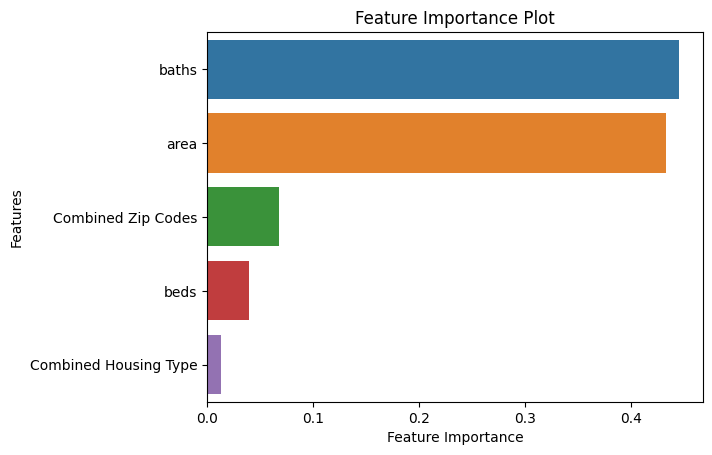

In [10]:
# Isolate random forest model
rf_model = models['Random Forest']

# Extract feature importance
feature_importances = rf_model.feature_importances_

# List all feature names
feature_names = ['beds',
                 'baths',
                 'area', 
                 'type_APARTMENT',
                 'type_SINGLE_FAMILY',
                 'type_TOWNHOUSE',
                 'zip_55401',
                 'zip_55402',
                 'zip_55403',
                 'zip_55404',
                 'zip_55405',
                 'zip_55406',
                 'zip_55407',
                 'zip_55408',
                 'zip_55409',
                 'zip_55410',
                 'zip_55411',
                 'zip_55412',
                 'zip_55413',
                 'zip_55414',
                 'zip_55415',
                 'zip_55416',
                 'zip_55417',
                 'zip_55418',
                 'zip_55419',
                 'zip_55430',
                 'zip_55454']

# List zip codes
zip_code_features = ['zip_55401',
                     'zip_55402',
                     'zip_55403',
                     'zip_55404',
                     'zip_55405',
                     'zip_55406',
                     'zip_55407',
                     'zip_55408',
                     'zip_55409',
                     'zip_55410',
                     'zip_55411',
                     'zip_55412',
                     'zip_55413',
                     'zip_55414',
                     'zip_55415',
                     'zip_55416',
                     'zip_55417',
                     'zip_55418',
                     'zip_55419',
                     'zip_55430',
                     'zip_55454']

# List housing type
type_features = ['type_APARTMENT', 'type_SINGLE_FAMILY', 'type_TOWNHOUSE']

# Sort the feature importances and feature names in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_names = [feature_names[i] for i in sorted_indices]

# Create new lists without the zip code and type features
filtered_names = [name for name in sorted_names if name not in zip_code_features and name not in type_features]
filtered_importances = [importance for name, importance in zip(sorted_names, sorted_importances) if name not in zip_code_features and name not in type_features]

# Calculate the combined importance for zip code and type features
zip_combined_importance = sum(importance for name, importance in zip(sorted_names, sorted_importances) if name in zip_code_features)
type_combined_importance = sum(importance for name, importance in zip(sorted_names, sorted_importances) if name in type_features)

# Create a list of labels combining original feature names and combined feature labels
labels = filtered_names + ['Combined Zip Codes'] + ['Combined Housing Type']

# Append the combined importance to the filtered lists
filtered_importances.extend([zip_combined_importance, type_combined_importance])

# Sort the filtered names and importances in descending order
sorted_filtered_indices = sorted(range(len(filtered_importances)), key=lambda k: filtered_importances[k], reverse=True)
sorted_filtered_names = [labels[i] for i in sorted_filtered_indices]
sorted_filtered_importances = [filtered_importances[i] for i in sorted_filtered_indices]

# Create the feature importance plot
sns.barplot(x=sorted_filtered_importances, y=sorted_filtered_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

When considering the overall importance, the combined impact of zip codes is greater than that of beds. However, it is important to note that beds hold more significance compared to any individual zip code. Additionally, based on the cumulative importance of housing types, we can infer that individual zip codes carry more weight than the individual housing types.

The plot provides valuable insights into the factors that strongly influence the prediction of rental prices. It indicates that two key features, namely the number of bathrooms and the total area of each housing unit, play a significant role in determining the rental price.

A higher number of bathrooms tends to correspond to higher rental prices, as it implies added convenience and amenities for potential tenants. Similarly, the total area of a housing unit, reflecting its size and spaciousness, is a crucial factor in influencing rental prices. Larger units with more square footage generally command higher rental rates.

By identifying these important features, the plot allows us to prioritize and focus our attention on these variables when analyzing and understanding rental price dynamics. Understanding the impact of bathrooms and area on rental prices can guide various stakeholders, such as landlords, real estate agents, and tenants, in making informed decisions and negotiating fair rental agreements.

The feature importance plot offers valuable insights into the inner workings of our model; however, it does not provide an assessment of our model's effectiveness. To gauge the effectiveness of our model, we need to employ another visualization.

## Scatter Plot

The scatter plot is considered the optimal visualization for assessing the effectiveness of our model. In this plot, we represent the model's predicted prices on the x-axis and the actual prices on the y-axis. To facilitate comparison and identify the alignment between predicted and actual prices, we incorporate a diagonal line in the plot. This reference line helps us assess the accuracy and precision of our model's predictions.

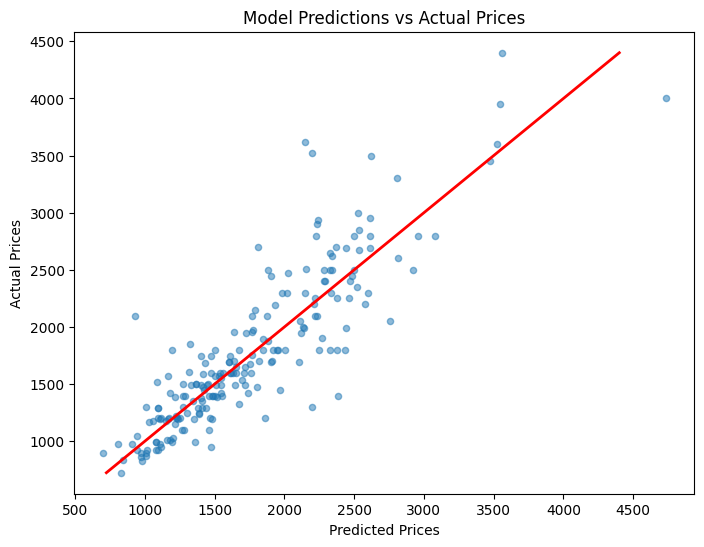

In [15]:
# Make predictions on the test data
new_predictions = rf_model.predict(X_test)

# Create a scatter plot of predicted prices vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(new_predictions, y_test, s=20, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-', linewidth=2)  # Add diagonal line for reference
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Model Predictions vs Actual Prices')
plt.show()


The scatter plot provides compelling evidence of our model's effectiveness in predicting rental prices. The data reveals a clear linear trend, indicating a positive correlation between predicted and actual prices. While there is evidence of heteroscedasticity, meaning that the variance of actual prices increases with higher predicted prices, this does not render our model inappropriate. Random forest regression, being a nonparametric method, does not hinge on the assumptions of a normal distribution. Therefore, the increasing variance does not pose a significant issue.

The discrepancy between the diagonal line and each data point represents the disparity between our model's predicted price and the optimal prediction. To provide a clearer visualization of this difference, we utilize a prediction error plot, which is presented below.

## Prediction Error Plot


A prediction error plot is a graphical representation that helps us assess the performance of a predictive model. By plotting the prediction errors, we can visually analyze the accuracy and consistency of the model's predictions. This plot allows us to identify patterns, trends, and potential areas of improvement in the model's performance.

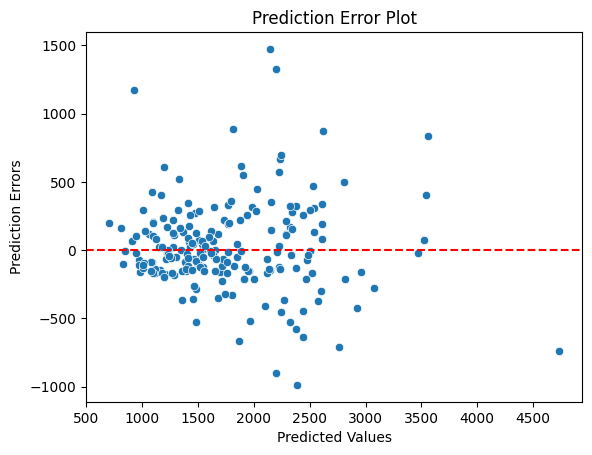

In [13]:
# Compute errors
errors = y_test - new_predictions

# Generate prediction error plot
sns.scatterplot(x=new_predictions, y=errors)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Prediction Errors')
plt.title('Prediction Error Plot')
plt.show()

The prediction error plot showcases a scattered pattern, revealing no discernible systematic deviation from the reference line. The errors are distributed randomly both above and below the line, indicating that the model's predictions are equally prone to overestimation or underestimation across the entire range of observations. This absence of a specific pattern or trend in the errors suggests that the model is unbiased, showing no inherent tendency to consistently overestimate or underestimate the actual values.

The random distribution of errors signifies that the model's predictions are not affected by any systematic bias or confounding factors that consistently influence its performance. This finding instills confidence in the model's ability to provide reliable predictions across various instances, as it is not skewed towards favoring either overestimation or underestimation. Researchers and practitioners can trust the model's outcomes, knowing that it exhibits a balanced and unbiased approach in its predictive capabilities.

# Conclusion

In conclusion, the model developed for predicting rental prices demonstrates strong performance and reliability. Through rigorous analysis and evaluation, employing various machine learning algorithms and metrics, we have determined that the random forest regression model outperforms other models. The model showcases low mean squared error and mean absolute error scores, indicating accurate predictions with minimal deviation from the actual rental prices. Additionally, the high R-squared value signifies that a significant portion of the variance in rental prices can be explained by the model. The accompanying visualizations, including the feature importance plot, scatter plot, and prediction error plot, provide valuable insights into the model's inner workings and its ability to handle diverse datasets. Overall, this model holds great promise in assisting real estate professionals, researchers, and decision-makers in making informed decisions and predictions regarding rental prices.